# Lecture 7: Assignment 1 Discussion

---

1. **Road Maintenance Problem**

    The Chennai Unified Metropolitan Transport Authority (CUMTA) is planning to allocate ₹5,00,000 to maintain two major arterial routes - $\text{R}_1$ and $\text{R}_2$. Here, $\text{R}_1$ has a maintenance cost of ₹50,000 per kilometer, while $\text{R}_2$ amounts for ₹30,000 per kilometer for road maintenance. If CUMTA plans to finance upkeep of at least 5 kilometers on both the arterial routes to ensure a minimal level of service on the two routes, then,

    - Formulate a mathematical model optimising the total length of roads maintained. (3)
    
      Objective:
      
      $$
      \max_{x_1, x_2} \ z = x_1 + x_2
      $$

      Subject to:

      $$
      \begin{aligned}
      50000x_1 + 30000x_2 & \leq 500000 \\
      x_1 & \geq 5 \\
      x_2 & \geq 5 \\
      x_1 & \geq 0 \\
      x_2 & \geq 0
      \end{aligned}
      $$

      ```{note}
      Each equation carries 1/2 marks
      ```

    - Clearly explain the objective function, decision variables, as well as technical and domain constraints. (1)

      If $x_1, x_2$ - decision variables, are the length of road maintained on the arterial routes $\text{R}_1$ and $\text{R}_2$, respectively, then, the objective function - $z = x_1 + x_2$, represents the total length of roads maintained. Consequently, the technical constraints include the budget constaint - $50000x_1 + 30000x_2 \leq 500000$, as well as the service level constraints - $x_1 \geq 5$ and $x_2 \geq 5$. Note, $x_1, x_2 \geq 0$ represents the domain constraint.

      ```{note}
      Each explanation carries 1/3 marks
      ```

    - State the necessary assumptions. (2)
    
      Proportionality - The contribution of each decision variable to the objective function and constraints is poroportional to the value of the variable.

      Additivity - The contribution of each decision variable to the objective function and constraints is independent of the values of other decision variables.

      Divisibility - The decision variables are allowed to take fractional values.

      Certainty - All the parameters are known with certainty.

      ```{note}
      Each assumption carries 1/2 marks
      ```

    - Appropiately categorise the optimisation problem. (1)

      Functional Classification - Linear

      Temporal Classification - Static

      Certainty Classification - Deterministic

      ```{note}
      Each categorisation carries 1/3 marks
      ```

  Based on the formulation developed, develop figure showcasing,

  - Isocost lines (2)

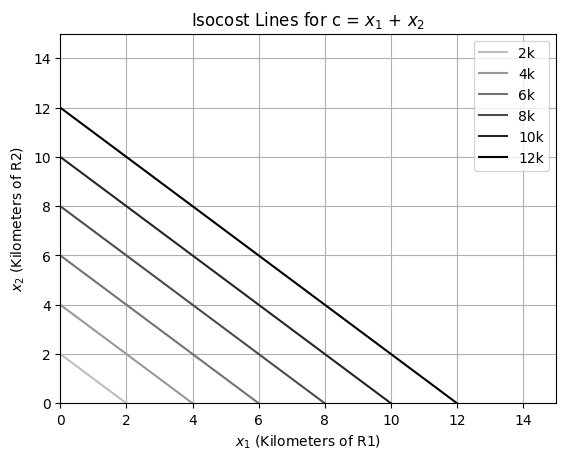

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function parameters
c1, c2 = 1, 1         # Parameters for the objective function c1 * x1 + c2 * x2

# Define the range of x1 values
x1 = np.linspace(0, 100, 200)

# Define set of isocost values (C)
C = [2, 4, 6, 8, 10, 12]  # Adjust these as needed

for i,c in enumerate(C):
  # Calculate x2 value for iscost line c1 * x2 + c2 * x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75 - 0.15 * i), label=f'{c}k')

# Set plot attributes
plt.xlabel(r'$x_1$ (Kilometers of R1)')
plt.ylabel(r'$x_2$ (Kilometers of R2)')
plt.title('Isocost Lines for c = $x_1$ + $x_2$')
plt.legend()
plt.grid(True)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()


  - Feasible region (2)

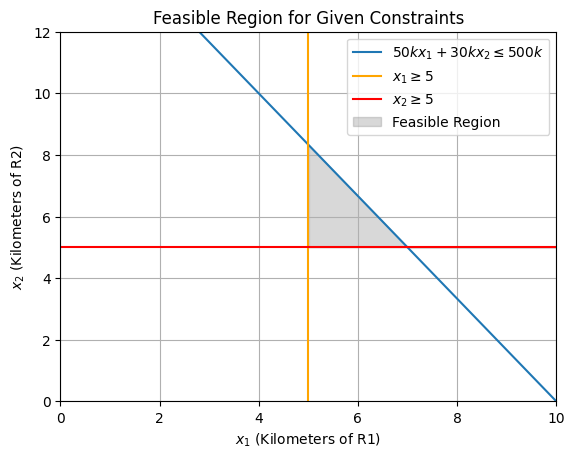

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define constraint coefficients
c1, c2 = 1, 1         # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 50000, 30000, 500000   # Coefficients for constraint a11 * x1 + a12 * x2 <= b1
a21, a22, b2 = 1, 0, 5                # Coefficients for constraint a21 * x1 + a22 * x2 >= b2
a31, a32, b3 = 0, 1, 5                # Coefficients for constraint a31 * x1 + a32 * x2 >= b3

# Define the range of x1 values
x1 = np.linspace(0, b1/a11, 400)

# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 <= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 >= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 + a32 * x2 >= b3

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11//1000}kx_1 + {a12//1000}kx_2 \leq {b1//1000}k$')
plt.axvline(x=b2, label=fr'$x_1 \geq {b2}$', color='orange')
plt.axhline(y=b3, label=fr'$x_2 \geq {b3}$', color='red')

# Fill the feasible region
plt.fill_between(x1, x2_3, np.maximum(x2_1, x2_3), where=(x1 >= x2_2), color='grey', alpha=0.3, label="Feasible Region")
                 
# Set plot attributes
plt.xlim(0, max(x1))
plt.ylim(0, max(x2))
plt.xlabel(r'$x_1$ (Kilometers of R1)')
plt.ylabel(r'$x_2$ (Kilometers of R2)')
plt.legend()
plt.title("Feasible Region for Given Constraints")
plt.grid(True)

# Display the figure
plt.show()

  - Optimal solution (decision variable and objective function value) (2)

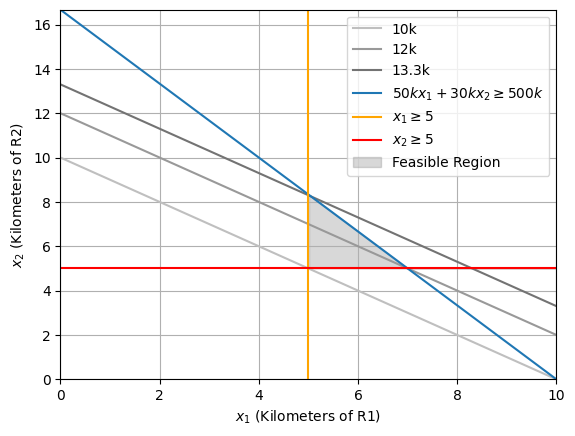

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function parameters and constraint coefficients
a11, a12, b1 = 50000, 30000, 500000   # Coefficients for constraint a11 * x1 + a12 * x2 <= b1
a21, a22, b2 = 1, 0, 5                # Coefficients for constraint a21 * x1 + a22 * x2 >= b2
a31, a32, b3 = 0, 1, 5                # Coefficients for constraint a31 * x1 + a32 * x2 >= b3

# Define the range of x1 values
x1 = np.linspace(0, b1/a11, 400)

# Define set of isocost values (C)
C = [10, 12, 13.3]

for i,c in enumerate(C):
  # Calculate x2 value for iscost line c1 * x2 + c2 * x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75 - 0.15 * i), label=f'{c}k')
  
# Calculate x2 values for each constraint
x2_1 = (b1 - a11 * x1) / a12  # From a11 * x1 + a12 * x2 <= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 >= b2
x2_3 = np.full_like(x1, b3)   # From a31 * x1 + a32 * x2 >= b3

# Plot the constraints
plt.plot(x1, x2_1, label=fr'${a11//1000}kx_1 + {a12//1000}kx_2 \geq {b1//1000}k$')
plt.axvline(x=b2, label=fr'$x_1 \geq {b2}$', color='orange')
plt.axhline(y=b3, label=fr'$x_2 \geq {b3}$', color='red')

# Fill the feasible region
plt.fill_between(x1, x2_3, np.maximum(x2_1, x2_3), where=(x1 >= x2_2), color='grey', alpha=0.3, label="Feasible Region")
                 
# Set plot attributes
plt.xlim(0, max(x1))
plt.ylim(0, max(x2_1))
plt.xlabel(r'$x_1$ (Kilometers of R1)')
plt.ylabel(r'$x_2$ (Kilometers of R2)')
plt.legend()
plt.grid(True)

# Display the figure
plt.show()

The optimal solution includes 5 kms of repair on R1 and 8.34 kms of repair on R2.

---

2. **Holiday-Special Train Scheduling Problem**
    
    The operations team of the Southern Indian Railways wants to schedule holiday-special trains between Chennai and Hyderabad to cater to the increased passenger demand during the Pongal festival. The surge in passenger demand for the three days prior to the festival is expected to be 10k, 15k, and 12k passengers, respectively. If a holiday-special train can cater to a maximum of 1500 passengers at an  operational cost of ₹150/km, then,

    - Formulate a mathematical model optimising railway operations. (4)
    
      Taking the distance between Hyderabad and Chennai to be 630km, 

      Objective:
  
      $$
      \min_{x_1, x_2, x_3} \ z = (150 \times 630)x_1 + (150 \times 630)x_2 + (150 \times 630)x_3
      $$

      Subject to:

      $$
      \begin{aligned}
      1500x_1 & \geq 10000 \\
      1500x_2 & \geq 15000 \\
      1500x_3 & \geq 12000 \\
      x_1 & \in \mathbb{Z}_+ \\
      x_2 & \in \mathbb{Z}_+ \\
      x_3 & \in \mathbb{Z}_+ 
      \end{aligned}
      $$

      ```{note}
      The objective function carries 1 mark, while each constraint equation carries 1/2 marks
      ```

    - Clearly indicate the objective function, decision variables, as well as technical and domain constraints. (1)

      If $x_1, x_2, x_3$ - decision variables, are the number holiday-special trains operating the three day prior to the festival, respectively, then, the objective function - $z = (150 \times 630)x_1 + (150 \times 630)x_2 + (150 \times 630)x_3$, represents the total operating costs. Consequently, the technical constraints include the demand constaints - $1500x_1 \geq 10000$, $1500x_1 \geq 15000$, and $1500x_1 \geq 12000$. Note, $x_1, x_2 \in \mathbb{Z}_+ $ represents the domain constraint. 

      ```{note}
      Each explanation carries 1/3 marks
      ```

    - State the necessary assumptions. (2)
    
      Proportionality - The contribution of each decision variable to the objective function and constraints is poroportional to the value of the variable.

      Additivity - The contribution of each decision variable to the objective function and constraints is independent of the values of other decision variables.

      Certainty - All the parameters are known with certainty.

      ```{note}
      Each assumption carries 2/3 marks
      ```

    - Appropiately categorise the optimisation problem. (1)
    
      Functional Classification - Linear

      Temporal Classification - Dynamic

      Certainty Classification - Deterministic

      
      ```{note}
      Each categorisation carries 1/3 marks
      ```

---

3. **Amazon Last-Mile Delivery Problem**

    Amazon plans to operate three types of delivery fleets $\text{T}_1$ (diesel van), $\text{T}_2$ (electric van), and T3 (motorbike) in Chennai. The table below presents key characteristics of these three delivery vehicles - purchase cost, operatonal cost (fuel cost + maintenance cost + driver wage), and capacity. 
    
      | Vehicle Type          | Purchase Cost (₹)        | Operational cost (₹ per km) | Capacity (number of customers) |
      |-----------------------|--------------------------|-----------------------------|--------------------------------|
      | Diesel Van            | 6,00,000                 | ₹7 + ₹3 + ₹25 = ₹35         | 200                            |
      | Electric Van          | 9,00,000                 | ₹2 + ₹1 + ₹25 = ₹28         | 150                            |
      | Motorbike             | 1,50,000                 | ₹3 + ₹1 + ₹25 = ₹29         | 20                             |
    
    Using the following notations, answer the questions below,

    Notations:

    - number of delivery vehicles purchased:  $f_i \ \forall \in [1,3]$

    - number of delivery tours per vehicle: $m_i \ \forall \in [1,3]$

    - number of customer per delivery tour: $c_i \ \forall \in [1,3]$

    Questions:

    - Formulate the daily amoritsed fixed cost assuming a planning horizon of 7 years with 330 working days, and a discount rate of 3%. (3)

      $$
      \text{FC} = (60000f_1 + 900000f_2 + 150000f_3) * (0.03 / (1 - 1.03 ^ {-7})) / 330
      $$

      ```{note}
      The summation of non-amortized fixed cost carries 1 mark, while the amortization factor carries 2 marks
      ```

    - Formulate the operational cost if the length of one delivery tour is given by $l_i = 2 \rho + k c_i / \sqrt \delta$, where $\rho = 25$ is the long-haul distance, $k = 0.57$ is last-mile constant, and $\delta = 25$ is customer density. (3)

      $$
      \text{OC} = 35(50 + 0.114c_1)m_1f_1 + 28(50 + 0.114c_2)m_2f_2 + 29(50 + 0.114c_3)m_3f_3
      $$

      ```{note}
      Each term of the equation carries 1 marks
      ```   

    - Formulate the constraints assuming that Amazon a) needs to serve a total of 12000 customers b) must purchase at least 5 diesel and 10 electric vans, and c) can have a delivery vehicle perform a maximum of 3 delivery tours only. (3)

      $$
      \begin{aligned}
      c_1m_1f_1 + c_2m_2f_2 + c_3m_3f_3 & \geq 12000 \\
      c_1 & \leq 200 \\
      c_2 & \leq 150 \\
      c_3 & \leq 20 \\
      m_1 & \leq 3 \\
      m_2 & \leq 3 \\
      m_3 & \leq 3 \\
      f_1 & \geq 5 \\
      f_2 & \geq 10 \\
      c_1 & \in \mathbb{Z}_+ \\
      c_2 & \in \mathbb{Z}_+ \\
      c_3 & \in \mathbb{Z}_+ \\
      m_1 & \in \mathbb{Z}_+ \\
      m_2 & \in \mathbb{Z}_+ \\
      m_3 & \in \mathbb{Z}_+ \\
      f_1 & \in \mathbb{Z}_+ \\
      f_2 & \in \mathbb{Z}_+ \\
      f_3 & \in \mathbb{Z}_+
      \end{aligned}
      $$

      ```{note}
      Each equation carries 1/6 marks
      ```